In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from tabulate import tabulate

In [7]:
def load_exp(name):
    loss_history_path = os.path.join('exps/', name, 'loss.txt')
    coords_history_path = os.path.join('exps/', name, 'coords.txt')
    norm_history_path = os.path.join('exps/', name, 'norm.txt')
    with open(loss_history_path, "r") as loss, open(coords_history_path, "r") as coords, open(norm_history_path, "r") as norm:
        loss = list(map(float, loss.readlines()))
        loss = [l / loss[0] for l in loss]
        coords = list(map(int, coords.readlines()))
        coords = np.cumsum(coords)
        norm = list(map(float, norm.readlines()))
        return {
            "name": name,
            "loss": loss,
            "coords": coords,
            "norm": norm,
        }

In [75]:
def get_exp(name, label):
    loss, coords = load_exp(name)
    return {
        "name": name,
        "label": label,
        "loss": loss,
        "coords": np.cumsum(coords),
    }

In [83]:
EXPS_DIR = 'exps/'
EXPS = [f.path[len(EXPS_DIR):] for f in os.scandir(EXPS_DIR) if f.is_dir()]

experiments = [load_exp(exp) for exp in EXPS]
experiments.sort(key=lambda exp : exp['coords'][-1])

experiments = experiments

table = [
    ["compression", "transmitted coordinates"],
    *[
        [exp['name'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

-----------  -----------------------
compression  transmitted coordinates
RandK        660
Mult         660
None         6780
-----------  -----------------------


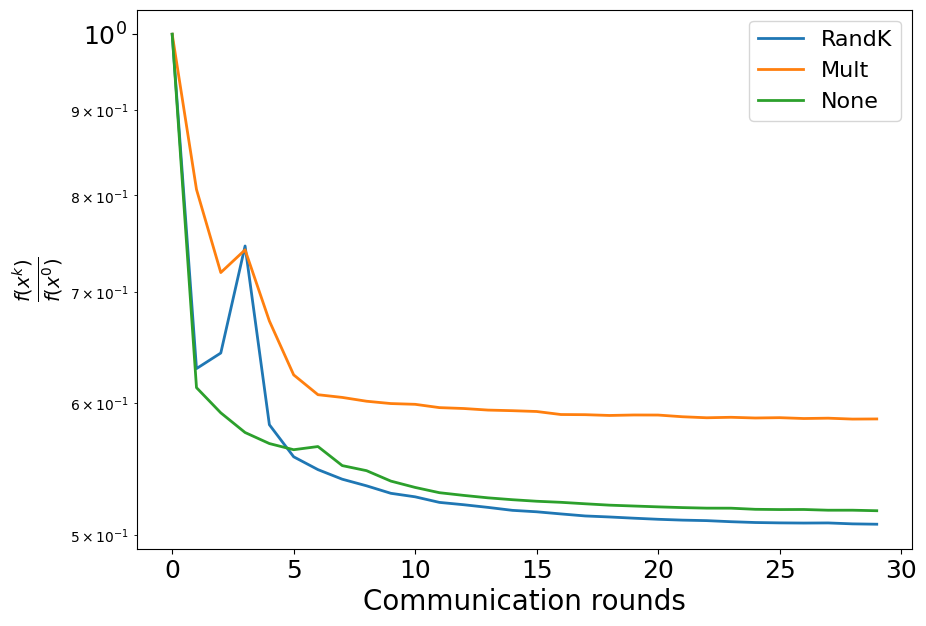

In [84]:
plt.figure(figsize=(10, 7))

for exp in experiments:
    plt.semilogy(
        # exp['coords'],
        exp['loss'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Communication rounds", fontsize=20)
plt.ylabel(r"$\frac{f(x^k)}{f(x^0)}$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

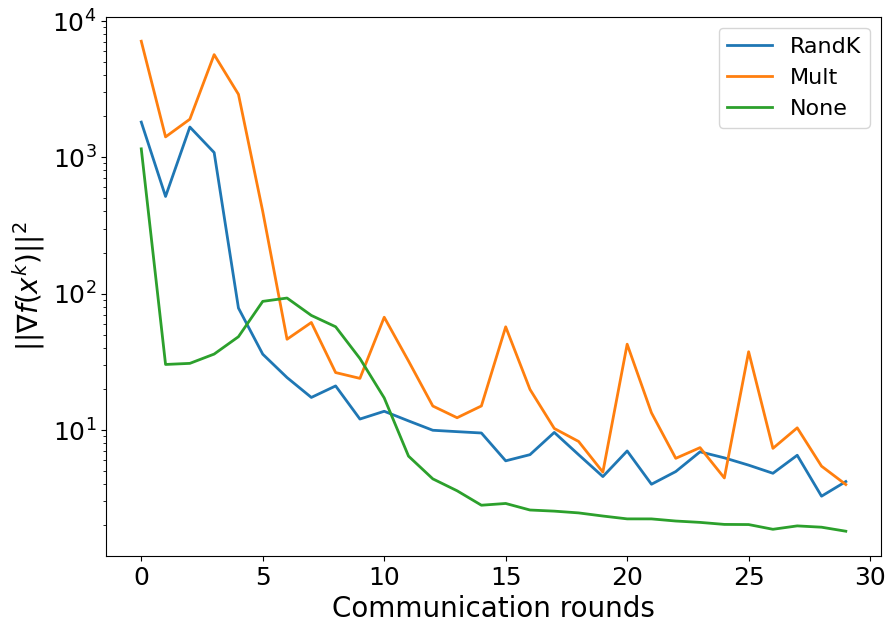

In [85]:
plt.figure(figsize=(10, 7))

for exp in experiments:
    plt.semilogy(
        # exp['coords'],
        exp['norm'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Communication rounds", fontsize=20)
plt.ylabel(r"$||\nabla{f(x^k)}||^2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)